In [0]:
!/local_disk0/.ephemeral_nfs/envs/pythonEnv-10c5ede3-5c3a-4570-a942-ad5a2e4d4e23/bin/python -m pip install --upgrade pip
!pip3 install numpy --upgrade
!pip3 install chainer
!pip install opencv-python

/bin/bash: line 1: /local_disk0/.ephemeral_nfs/envs/pythonEnv-10c5ede3-5c3a-4570-a942-ad5a2e4d4e23/bin/python: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Not uninstalling numpy at /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-5441bbb4-23a8-426f-ad70-6d129d0253cb
    Can't uninstall 'numpy'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.2 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.25.2 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[noti

In [0]:
import keras
from keras.datasets import cifar10

In [0]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing import image
from keras.utils import to_categorical
from pathlib import Path
import numpy as np

In [0]:
cifar10_class_names = {
    0: 'Plane',
    1: 'Car',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Boat',
    9: 'Truck'
}

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


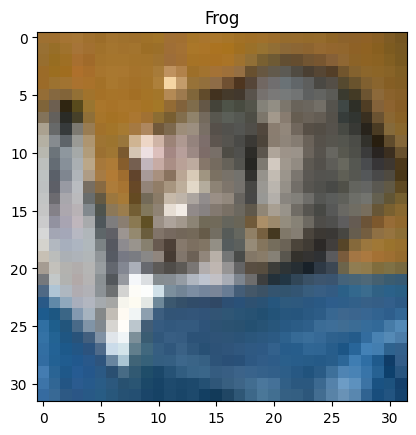

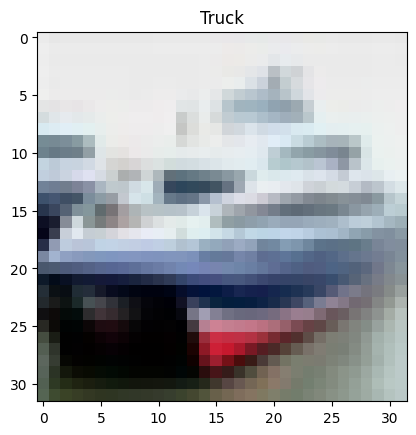

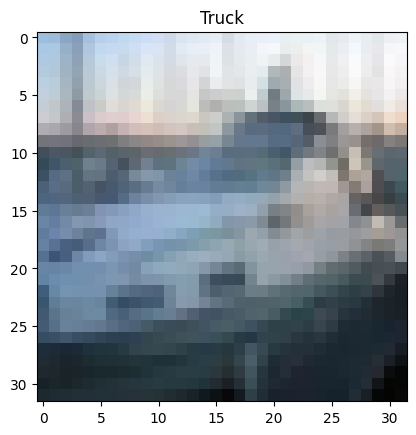

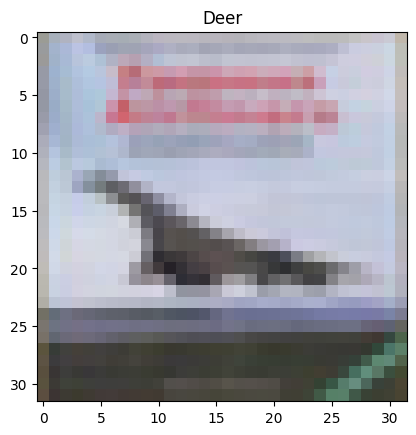

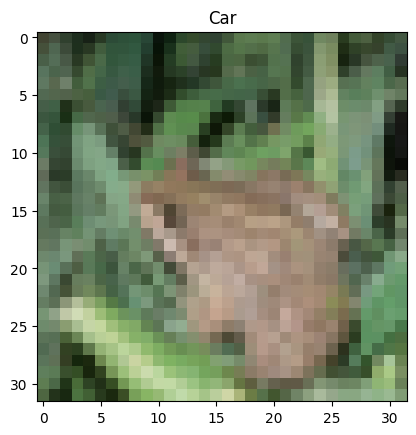

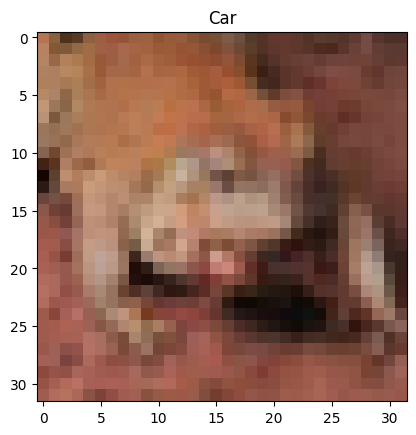

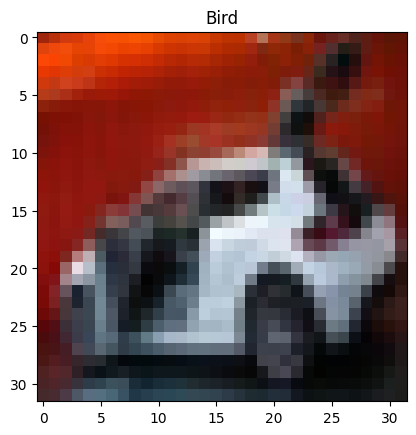

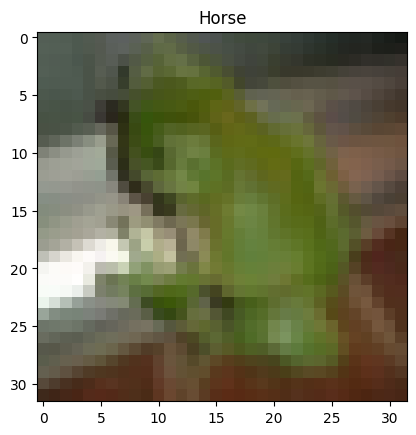

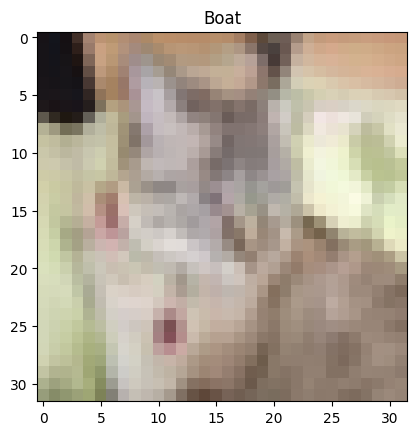

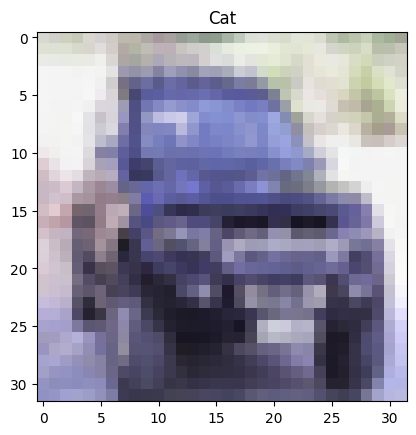

In [0]:
import matplotlib.pyplot as plt

for i in range(10):
    sample_image = x_test[i]
    image_class_number = y_train[i][0]
    image_class_name = cifar10_class_names[image_class_number]
    plt.imshow(sample_image)
    plt.title(image_class_name)
    plt.show()

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [0]:
model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True
)

model_structure = model.to_json()
f = Path('model_structure.json')
f.write_text(model_structure)
model.save_weights('model_weights.h5')

Epoch 1/10
 281/1563 [====>.........................] - ETA: 49s - loss: 1.2137 - accuracy: 0.5692

*** WARNING: max output size exceeded, skipping output. ***

 587/1563 [==========>...................] - ETA: 38s - loss: 0.6322 - accuracy: 0.7768

In [0]:
storage_account_name = 'techcommunity'
storage_account_access_key = '3fmvYhF+1wdZIlYlZYTcyR4Hosib+7kKEl+axFF/NywuUqLJd0dAQiC1hAZpfKCVkWGpJoSs+IT8+AStz42mbg=='
spark.conf.set('fs.azure.account.key.' + storage_account_name + '.blob.core.windows.net', storage_account_access_key)

blob_container = 'images'
filePath = "wasbs://" + blob_container + "@" + storage_account_name + ".blob.core.windows.net/car.png"

df = spark.read.format("image").load(filePath)
display(df.select("image.origin"))
df.display()

origin
wasbs://images@techcommunity.blob.core.windows.net/car.png


image


In [0]:
storageAccountName = "techcommunity"
storageAccountAccessKey = "3fmvYhF+1wdZIlYlZYTcyR4Hosib+7kKEl+axFF/NywuUqLJd0dAQiC1hAZpfKCVkWGpJoSs+IT8+AStz42mbg=="
blobContainerName = "images"
mountPoint = "/mnt/data/"
if not any(mount.mountPoint == mountPoint for mount in dbutils.fs.mounts()):
  try:
    dbutils.fs.mount(
      source = "wasbs://{}@{}.blob.core.windows.net".format(blobContainerName, storageAccountName),
      mount_point = mountPoint,
      extra_configs = {'fs.azure.account.key.' + storageAccountName + '.blob.core.windows.net': storageAccountAccessKey}
    )
    print("mount succeeded!")
  except Exception as e:
    print("mount exception", e)

mount succeeded!


In [0]:
#dbutils.fs.mounts() 
dbutils.fs.ls("/mnt/data/")

[FileInfo(path='dbfs:/mnt/data/car.png', name='car.png', size=13209, modificationTime=1694570605000),
 FileInfo(path='dbfs:/mnt/data/frog.png', name='frog.png', size=13547, modificationTime=1694570537000),
 FileInfo(path='dbfs:/mnt/data/truck.png', name='truck.png', size=13428, modificationTime=1694570605000)]

In [0]:
img = image.load_img("/dbfs/mnt/data/car.png", target_size=(32,32))
image_to_test = image.img_to_array(img) / 255
list_of_images = np.expand_dims(image_to_test, axis=0)
results = model.predict(list_of_images)
single_result = results[0]
most_likely_class_index = int(np.argmax(single_result))
class_likehood = single_result[most_likely_class_index]
class_label = cifar10_class_names[most_likely_class_index]

print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likehood))

1/1 [==============================] - 0s 117ms/step
This is image is a Car - Likelihood: 0.621302
